In [ ]:
# Malaria Parasite Infected Cell Prediction with Keras Framework #

In [ ]:
# Increasing the Cell Width of Jupyter Notebook

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# Importing Libraries

import os
import glob
import shutil
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from matplotlib.image import imread
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Showing the Device Information

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9114696078281439351
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11902662007697149833
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
# Showing the GPU Name

import tensorflow as tf
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Preparing the Dataset Folder

'''
from torchvision.datasets.utils import download_url
dataset_url = "url_of_the_dataset=cell_images.zip"
download_url(dataset_url, '.')
''';

# Extracting Images from the Archive
data = "./data"
if os.path.exists(data):
    shutil.rmtree(data)
!mkdir ./data

!unzip ./cell_images.zip -d ./data &> /dev/null

# Looking into the Data Directory
my_data_dir = './data/cell_images'
train_path = my_data_dir + '/train/'
test_path = my_data_dir + '/test/'

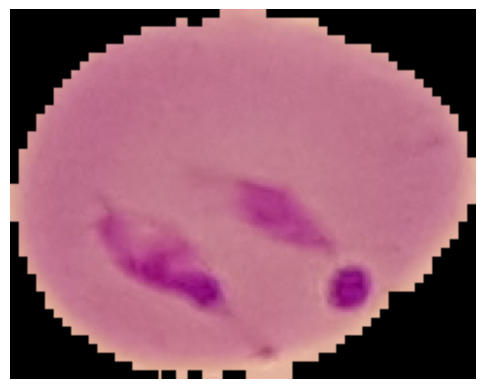

In [ ]:
# Getting a File from the Parasitized Cell Images in the Training Set Folder

para_cell = train_path + '/parasitized' + '/' + os.listdir(train_path + '/parasitized')[1]
para_img = imread(para_cell)
plt.axis('off'); plt.imshow(para_img);

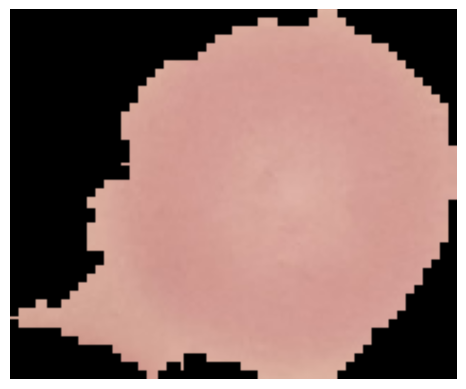

In [ ]:
# Getting a File from the Uninfected Cell Images in the Training Set Folder

uninf_cell = train_path + '/uninfected/' + os.listdir(train_path + '/uninfected')[1]
uninf_img = imread(uninf_cell)
plt.axis('off'); plt.imshow(uninf_img);

In [ ]:
# Checking the Shapes of Both Images

print(para_img.shape)
print(uninf_img.shape)

(127, 160, 3)
(130, 157, 3)


In [ ]:
# Number of Images in Both parasitized and uninfected Folders in the train_path

print(len(os.listdir(train_path + '/parasitized')))
print(len(os.listdir(train_path + '/uninfected')))

12480
12480


In [ ]:
# Number of Images in Both parasitized and uninfected Folders in the test_path

print(len(os.listdir(test_path + '/parasitized')))
print(len(os.listdir(test_path + '/uninfected')))

1300
1300


Height-Weight Distribution of the Parasitized Cells in Test Set
Height Mean: 134.643
Width  Mean: 133.318


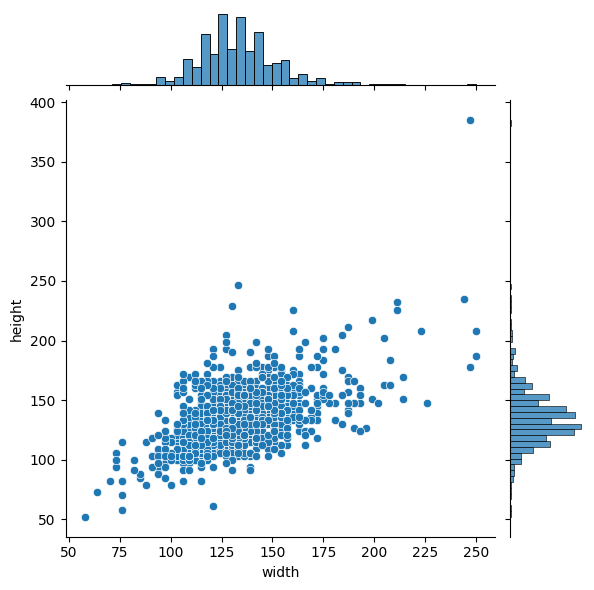

In [ ]:
# Height-Weight Distribution of the Parasitized Cells in Test Set

para_height = []
para_width = []
for image_filename in os.listdir(test_path + '/parasitized'):
    img = imread(test_path + '/parasitized' + '/' + image_filename)
    height, width, colors = img.shape
    para_height.append(height)
    para_width.append(width)

para_data = pd.DataFrame({
    'height': para_height,
    'width': para_width})

print("Height-Weight Distribution of the Parasitized Cells in Test Set")

print(f"Height Mean: {np.mean(para_height):.3f}")
print(f"Width  Mean: {np.mean(para_width):.3f}")
sns.jointplot(x='width', y='height', data=para_data);

Height-Weight Distribution of the Uninfected Cells in Test Set
Height Mean: 130.925
Width  Mean: 130.750


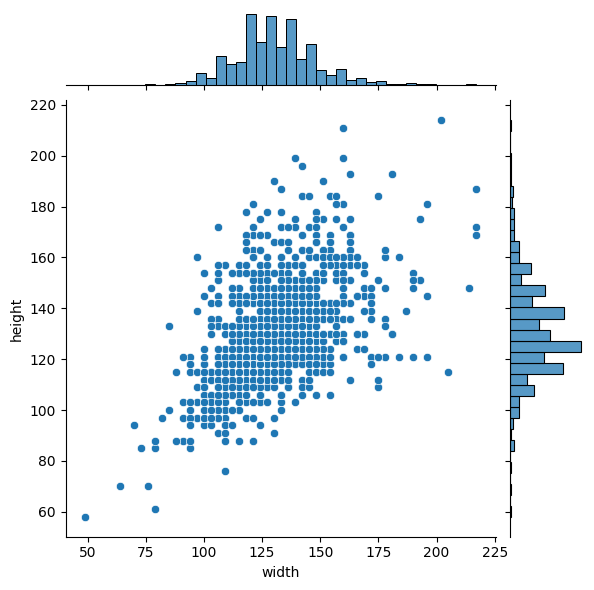

In [ ]:
# Height-Weight Distribution of the Uninfected Cells in Test Set

uninf_height = []
uninf_width = []
for image_filename in os.listdir(test_path + '/uninfected'):
    img = imread(test_path + '/uninfected' + '/' + image_filename)
    height, width, colors = img.shape
    uninf_height.append(height)
    uninf_width.append(width)

uninf_data = pd.DataFrame({
    'height': uninf_height,
    'width': uninf_width})

print("Height-Weight Distribution of the Uninfected Cells in Test Set")
print(f"Height Mean: {np.mean(uninf_height):.3f}")
print(f"Width  Mean: {np.mean(uninf_width):.3f}")
sns.jointplot(x='width', y='height', data=uninf_data);

In [ ]:
# Specifying the Shape of Images (Height, Weight, Channels) That will Enter the Model as Input Data
# >> The Mean of Both Height and Width Values in the Test Set are Around 130, so 128 is Chosen...
# ...for the CNN Model That will be Used Here Which Has 3 Downsampling Process (MaxPooling(2, 2))

image_shape = (128, 128, 3)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,       # Rotate the Image by 20 Degrees
                               width_shift_range=0.10,  # Shift the Image Width by A Max of 5%
                               height_shift_range=0.10, # Shift the Image Height by A Max of 5%
                               rescale=1/255,           # Rescale the Image by Normalzing It
                               shear_range=0.1,         # Shear: Cutting Away A Part of the Image (Max 10%)
                               zoom_range=0.1,          # Zoom in by 10% Max
                               horizontal_flip=True,    # Horizontal Flipping
                               fill_mode='nearest'      # Fill in Missing Pixels with the Nearest Filled Value
                              )

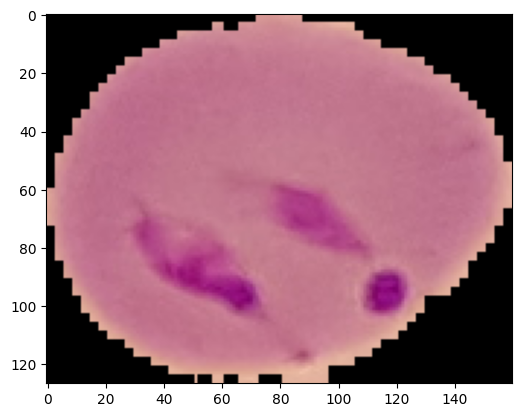

In [ ]:
# Plotting An Image from Direct Path

plt.imshow(para_img);

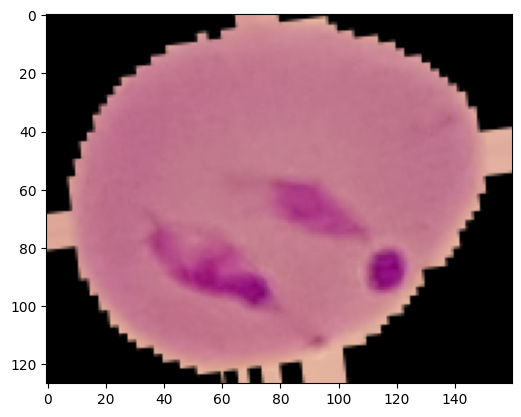

In [ ]:
# Plotting An Image from the Image Data Generator

plt.imshow(image_gen.random_transform(para_img));

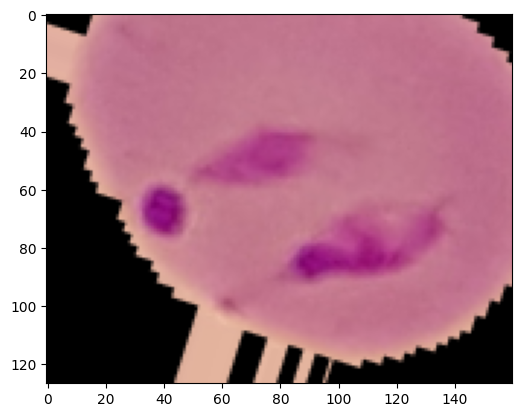

In [ ]:
# Plotting An Image from the Image Data Generator

plt.imshow(image_gen.random_transform(para_img));

In [ ]:
# Image/Class Information of the Training Images Path

image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
# Image/Class Information of the Testing Images Path

image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:
# Definition of A Sequential CNN Model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(1))
model.add(Activation('sigmoid'))

LAYERS: Conv2D-MaxPooling2D-Conv2D-MaxPooling2D-Conv2D-MaxPooling2D-Flatten-Dense-Activation-Dropout-Dense-Activation



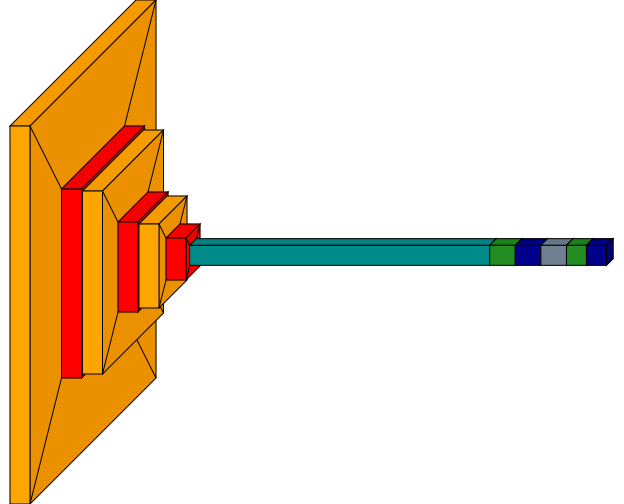

In [ ]:
# Visualizing the Model with visualkeras (Optional)

try:
    import visualkeras
except:
    !pip install visualkeras &> /dev/null
    import visualkeras

from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Flatten]['fill'] = 'darkcyan'
color_map[Dense]['fill'] = 'forestgreen'
color_map[Activation]['fill'] = 'darkblue'
color_map[Dropout]['fill'] = 'slategray'

print("LAYERS: Conv2D-MaxPooling2D-Conv2D-MaxPooling2D-Conv2D-MaxPooling2D-Flatten-Dense-Activation-Dropout-Dense-Activation\n")

scale = 3
visualkeras.layered_view(model, spacing=0, color_map=color_map,
                         scale_xy=scale, scale_z=0.1, max_z=scale * 100, to_file="model.png").convert("RGB")

In [ ]:
# Compiling the Model and Printing the Model Summary

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
# Defining the EarlyStopping and ReduceLROnPlateau Callbacks

early_stop = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4,
                              patience=2, min_lr=0.00001)

In [ ]:
# Batch Size

batch_size = 32

In [ ]:
# Training Data Generator

train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 24958 images belonging to 2 classes.


In [ ]:
# Testing Data Generator

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
# Showing the Class Indices in the Training Set

train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
# Training the Model for 50 Epochs with EarlyStopping and ReduceLROnPlateau Callbacks

results = model.fit_generator(train_image_gen, epochs=50,
                              validation_data=test_image_gen,
                              callbacks=[reduce_lr, early_stop])

Epoch 1/50
780/780 [==============================] - 118s 146ms/step - loss: 0.3614 - accuracy: 0.8337 - val_loss: 0.1939 - val_accuracy: 0.9392 - lr: 0.0010
Epoch 2/50
780/780 [==============================] - 112s 144ms/step - loss: 0.1768 - accuracy: 0.9427 - val_loss: 0.1645 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 3/50
780/780 [==============================] - 113s 144ms/step - loss: 0.1556 - accuracy: 0.9510 - val_loss: 0.1490 - val_accuracy: 0.9512 - lr: 0.0010
Epoch 4/50
780/780 [==============================] - 114s 146ms/step - loss: 0.1507 - accuracy: 0.9513 - val_loss: 0.1671 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 5/50
780/780 [==============================] - 112s 144ms/step - loss: 0.1505 - accuracy: 0.9520 - val_loss: 0.1449 - val_accuracy: 0.9546 - lr: 0.0010
Epoch 6/50
780/780 [==============================] - 112s 143ms/step - loss: 0.1474 - accuracy: 0.9520 - val_loss: 0.1588 - val_accuracy: 0.9515 - lr: 0.0010
Epoch 7/50
780/780 [==========================

In [ ]:
# Showing the List of Metric Names in the Model

model.metrics_names

['loss', 'accuracy']

In [ ]:
# Getting the History Data from the Trained Model

history = pd.DataFrame(model.history.history)

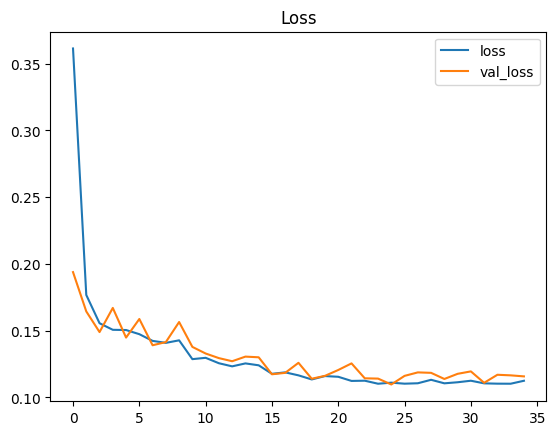

In [ ]:
# Plotting the Loss Graph

history[['loss','val_loss']].plot(title='Loss');

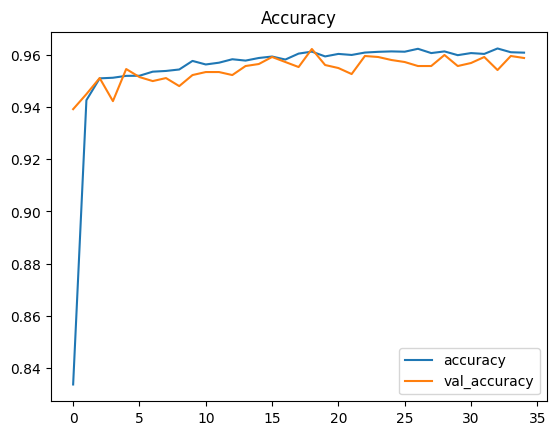

In [ ]:
# Plotting the Accuracy Graph

history[['accuracy','val_accuracy']].plot(title='Accuracy');

In [ ]:
# Evaluating the Trained Model with the Testing Data Generator

model.evaluate_generator(test_image_gen)

[0.11778891831636429, 0.9588461518287659]

In [ ]:
# Generating Predictions as Probabilities

pred_probabilities = model.predict_generator(test_image_gen)
pred_probabilities

array([[2.8459297e-03],
       [1.6034632e-04],
       [1.9726304e-03],
       ...,
       [9.8131794e-01],
       [9.9954635e-01],
       [9.3870914e-01]], dtype=float32)

In [ ]:
# # Converting Probabilities to True/False Predictions

predictions = pred_probabilities > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
# Showing the Classes in the List of Testing Images

test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Printing the Precision, Recall and F1-Score Values

print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1300
           1       0.95      0.97      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



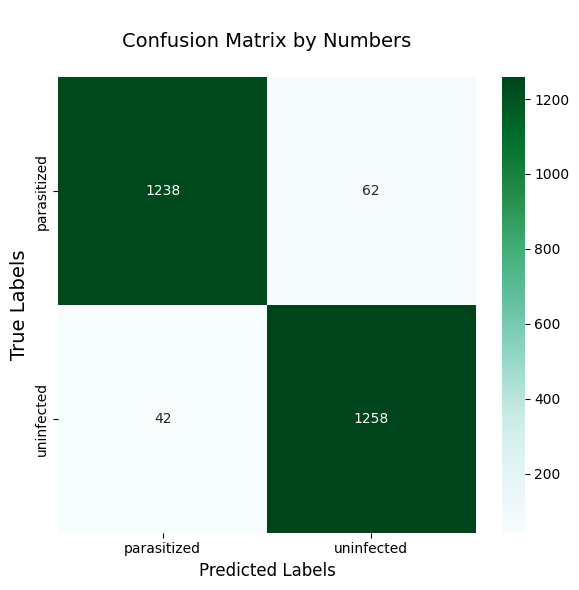

In [ ]:
# Confusion Matrix by Numbers

cf_matrix = confusion_matrix(test_image_gen.classes, predictions)

class_names = []
class_names.append("parasitized")
class_names.append("uninfected")

df_cm_n = pd.DataFrame(cf_matrix, class_names, class_names)

plt.figure(figsize=(6, 6))
sns.heatmap(df_cm_n, annot=True, cmap="BuGn", fmt='g')
plt.title("\nConfusion Matrix by Numbers\n", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

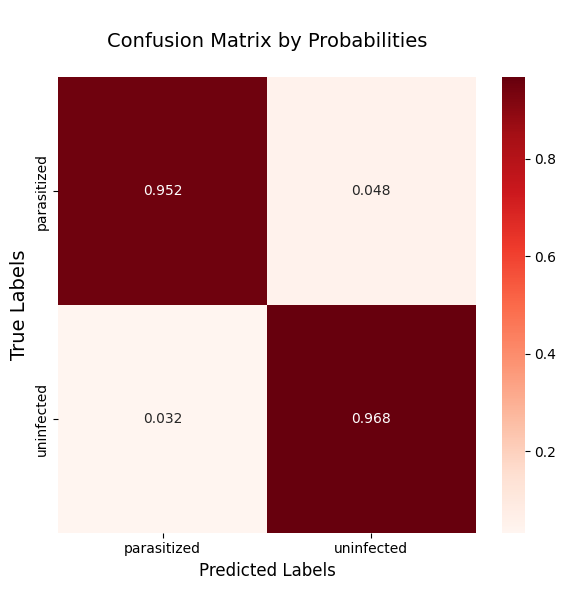

In [ ]:
# Confusion Matrix by Probabilities

cf_matrix = confusion_matrix(test_image_gen.classes, predictions)

class_names = []
class_names.append("parasitized")
class_names.append("uninfected")

df_cm_p = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], class_names, class_names)

plt.figure(figsize=(6, 6))
sns.heatmap(df_cm_p, annot=True, cmap='Reds', fmt=".3f")
plt.title("\nConfusion Matrix by Probabilities\n", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Saving the Whole Model

model.save('malaria_cell_predictor.keras')

In [ ]:
# Saving the Weights of the Model

model.save_weights('malaria_cell_predictor.h5')

In [ ]:
# Predicting Infections on Both Parasitized and Uninfected Cell Image Samples

In [ ]:
# A Parasitized Cell Image Path

para_cell

'./data/cell_images/train//parasitized/C59P20thinF_IMG_20150803_112802_cell_189.png'

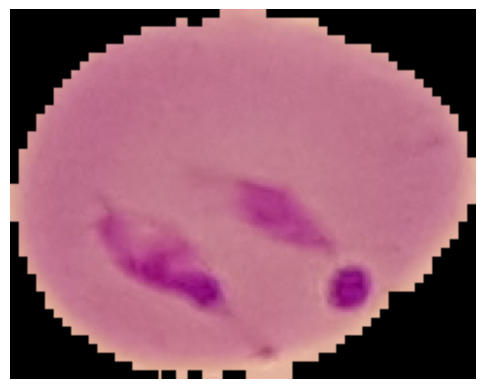

In [ ]:
# Reading and Plotting the Parasitized Cell Image

para_img = imread(para_cell)
plt.axis('off'); plt.imshow(para_img);

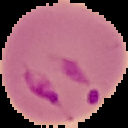

In [ ]:
# Resizing the Image to Fit in the Model Input Shape

para_image = image.load_img(para_cell, target_size=image_shape)
para_image

In [ ]:
# This is a PIL Image

type(para_image)

PIL.Image.Image

In [ ]:
# Converting the PIL Image to N-Dimensional Numpy Array (ndarray)

para_image = image.img_to_array(para_image)
type(para_image)

numpy.ndarray

In [ ]:
# Checking the Image Shape

para_image.shape

(128, 128, 3)

In [ ]:
# Expanding (Unsqueezing) the Image Shape to Put the Image into A Batch Form for the Model to Accept It

para_image = np.expand_dims(para_image, axis=0)    # in pytorch: para_image.unsqueeze(0)
para_image.shape

(1, 128, 128, 3)

In [ ]:
# Predicting the Infection Status of the Cell Image

predicted = model.predict(para_image)
predicted

1/1 [==============================] - 0s 171ms/step


array([[0.]], dtype=float32)

In [ ]:
# Getting the Prediction Result Item as A Single Integer

pred = int(predicted[0][0])
pred

0

In [ ]:
# Printing the Class Indices of the Train & Test Sets

print(train_image_gen.class_indices)
print(test_image_gen.class_indices)

{'parasitized': 0, 'uninfected': 1}
{'parasitized': 0, 'uninfected': 1}


In [ ]:
# Representations: 0 = Parasitized, 1 = Uninfected

In [ ]:
# Getting the Infection Status from the Class Indices by Using the Prediction Result

indices = train_image_gen.class_indices
result = [key for key, val in indices.items() if val == pred]
if(len(result) > 0):
    print("Predicted Result:", result[0])

Predicted Result: parasitized


In [ ]:
# An Uninfected Cell Image Path

uninf_cell

'./data/cell_images/train//uninfected/C100P61ThinF_IMG_20150918_144104_cell_48.png'

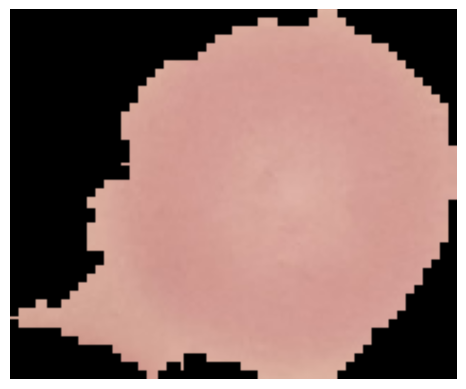

In [ ]:
# Reading and Plotting the Uninfected Cell Image

uninf_img = imread(uninf_cell)
plt.axis('off'); plt.imshow(uninf_img);

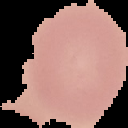

In [ ]:
# Resizing the Image to Fit in the Model Input Shape

uninf_image = image.load_img(uninf_cell, target_size=image_shape)
uninf_image

In [ ]:
# This is a PIL Image

type(uninf_image)

PIL.Image.Image

In [ ]:
# Converting the PIL Image to N-Dimensional Numpy Array (ndarray)

uninf_image = image.img_to_array(uninf_image)
type(uninf_image)

numpy.ndarray

In [ ]:
# Checking the Image Shape

uninf_image.shape

(128, 128, 3)

In [ ]:
# Expanding (Unsqueezing) the Image Shape to Put the Image into A Batch Form for the Model to Accept It

uninf_image = np.expand_dims(uninf_image, axis=0)    # in pytorch: uninf_image.unsqueeze(0)
uninf_image.shape

(1, 128, 128, 3)

In [ ]:
# Predicting the Infection Status of the Cell Image

predicted = model.predict(uninf_image)
predicted

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

In [ ]:
# Getting the Prediction Result Item as A Single Integer

pred = int(predicted[0][0])
pred

1

In [ ]:
# Printing the Class Indices of the Train & Test Sets

print(train_image_gen.class_indices)
print(test_image_gen.class_indices)

{'parasitized': 0, 'uninfected': 1}
{'parasitized': 0, 'uninfected': 1}


In [ ]:
# Representations: 0 = Parasitized, 1 = Uninfected

In [ ]:
# Getting the Infection Status from the Class Indices by Using the Prediction Result

indices = train_image_gen.class_indices
result = [key for key, val in indices.items() if val == pred]
if(len(result) > 0):
    print("Predicted Result:", result[0])

Predicted Result: uninfected


In [ ]:
# Predicting Infections on the Cell Images by Using 1 Loaded Model and 1 New Model with Loaded Weights

In [ ]:
# Loading the Saved Model

loaded_model = load_model('malaria_cell_predictor.keras')

In [ ]:
# Checking the Image Shape

para_image.shape

(1, 128, 128, 3)

In [ ]:
# Prediction with the Loaded Model

loaded_predicted = loaded_model.predict(para_image)
loaded_predicted

1/1 [==============================] - 0s 72ms/step


array([[0.]], dtype=float32)

In [ ]:
# Getting the Prediction Result Item as A Single Integer

loaded_pred = int(loaded_predicted[0][0])
loaded_pred

0

In [ ]:
# Getting the Infection Status from the Class Indices by Using the Prediction Result

indices = train_image_gen.class_indices
result = [key for key, val in indices.items() if val == loaded_pred]
if(len(result) > 0):
    print("Predicted Result:", result[0])

Predicted Result: parasitized


In [ ]:
# Defining A New Model

new_model = Sequential()

new_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
new_model.add(MaxPooling2D(pool_size=(2, 2)))

new_model.add(Flatten())

new_model.add(Dense(256))
new_model.add(Activation('relu'))

new_model.add(Dropout(0.4))

new_model.add(Dense(1))
new_model.add(Activation('sigmoid'))

new_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
# Loading the Weights to the New Model

new_model.load_weights('malaria_cell_predictor.h5')

In [ ]:
# Checking the Image Shape

uninf_image.shape

(1, 128, 128, 3)

In [ ]:
# Prediction of the New Model Before Loading the Weights

new_predicted = new_model.predict(uninf_image)
new_predicted

1/1 [==============================] - 0s 69ms/step


array([[1.]], dtype=float32)

In [ ]:
# Getting the Prediction Result Item as A Single Integer

new_pred = int(new_predicted[0][0])
new_pred

1

In [ ]:
# Getting the Infection Status from the Class Indices by Using the Prediction Result

indices = train_image_gen.class_indices
result = [key for key, val in indices.items() if val == new_pred]
if(len(result) > 0):
    print("Predicted Result:", result[0])

Predicted Result: uninfected


In [ ]:
# Removing the "data" Folder and All the Saved Model & Weight Files (Optional)

def remove_path(path):
    if os.path.isdir(path):
        shutil.rmtree(path)
    elif os.path.isfile(path):
        os.remove(path)

remove_path("data")
remove_path("model.png")
remove_path("malaria_cell_predictor.keras")
remove_path("malaria_cell_predictor.h5")

In [ ]:
# Terminate Session (for Colab Runtime)

from google.colab import runtime
runtime.unassign()